# CD-Proyecto de clasificación binaria

### Nombre: Salvador J. Pérez 

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.

Objective of Analysis:
Minimization of risk and maximization of profit on behalf of the bank.

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding who to give approval of the loan and who not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application. The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants.


In [421]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Obtener los datos

In [422]:
data = pd.read_csv("german.data", delimiter=' ', header = None) #Guardar el archivo .data en un dataframe
data.head()                                                     #Mostramos el contenido 


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [423]:
data.info() #Mostramos las caracteristicas del dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [424]:
#Agregamos nombres a las columnas
name = []
for col in data.columns:
    num = col + 1
    name.append('A' + str(num))
data.columns = name
data.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


In [425]:
data_numeric = pd.read_fwf("german_numeric.data", delimiter=' ', header = None) #Guardar el archivo .data en un dataframe
data_numeric.head()                                                             #Mostramos el dataframe

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [426]:
#data_numeric.info()

## 2. Procesamos los datos

In [427]:
#Convertimos los datos categóricos a valores numéricos
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_object_dtype

label = LabelEncoder()

for i in data.columns:
    if is_object_dtype(data[i]):
        data[i] = label.fit_transform(data[i])

data = data.fillna(0)
data.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2


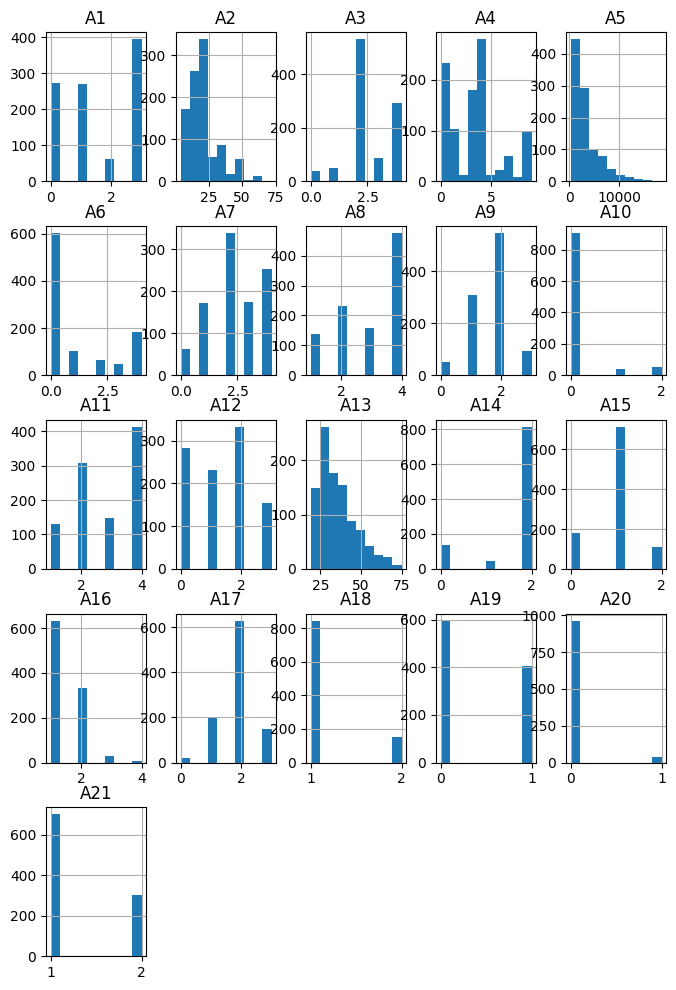

In [428]:
#Mostramos un histograma de los datos numéricos 
data.hist(figsize = (8,12))
plt.show()

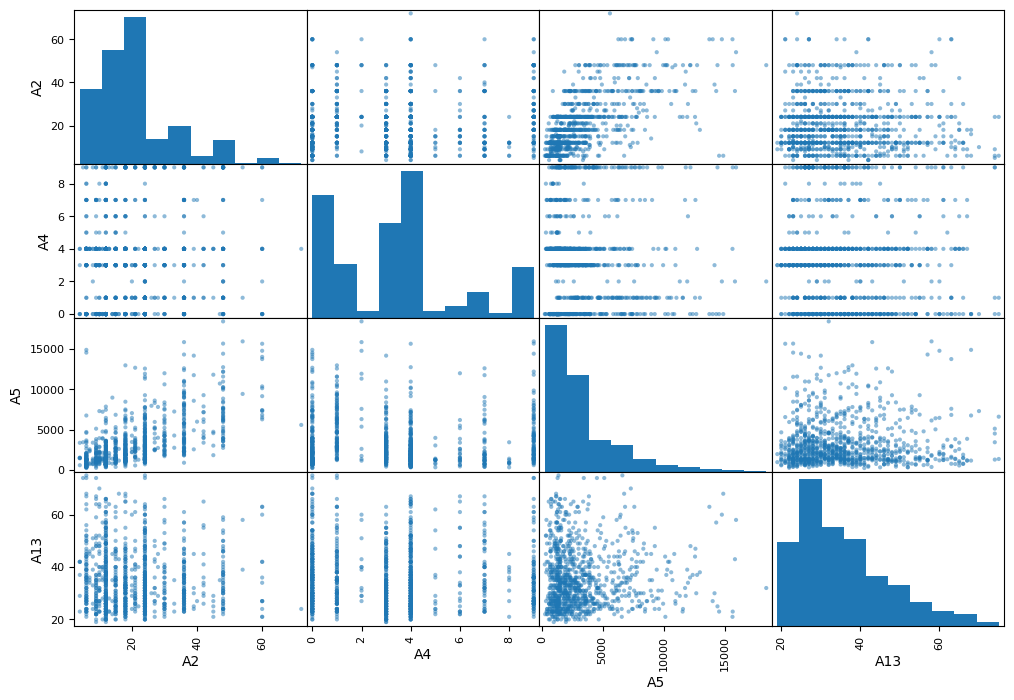

In [429]:
#hacer diagrmas de correlación
from pandas.plotting import scatter_matrix
atributos = ['A2', 'A4', 'A5', 'A13']
scatter_matrix(data[atributos], figsize = (12,8))
plt.show()

# Coeficiente de correlación Pearson

In [430]:
#Matriz de correlacion numérica
data[atributos].corr(method = 'pearson').round(2)

,A2,A4,A5,A13
A2,1.00,0.10,0.62,-0.04
A4,0.10,1.00,-0.03,-0.03
A5,0.62,-0.03,1.00,0.03
A13,-0.04,-0.03,0.03,1.00


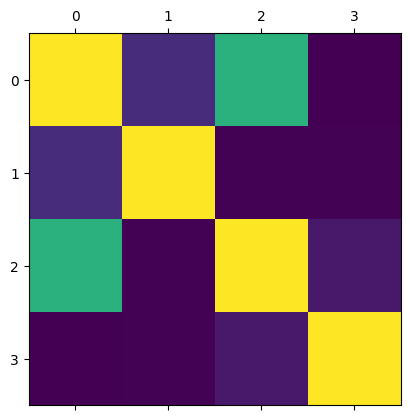

In [431]:
#Matriz de correlación visual
plt.matshow(data[atributos].corr())
plt.show()

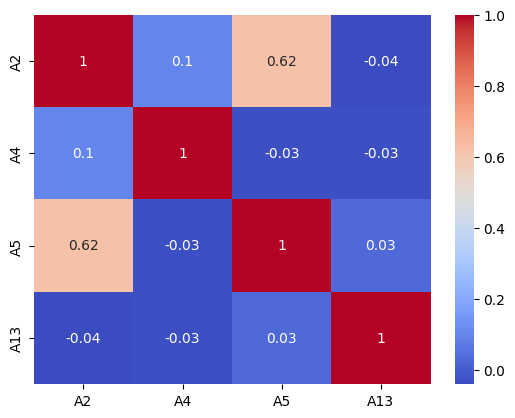

In [432]:
import seaborn as sn
corrMatrix = data[atributos].corr().round(2)
sn.heatmap(corrMatrix, annot = True , cmap ='coolwarm')
plt.show()

# 4. Preparación de datos para el entrenamiento


X: Params
Y: Creditibily 


Attribute 3: (qualitative) Credit history.
1. A30 : no credits taken/ all credits paid back duly
2. A31 : all credits at this bank paid back duly
3. A32 : existing credits paid back duly till now
4. A33 : delay in paying off in the past
5. A34 : critical account/	other credits existing (not at this bank)


In [433]:
#Asignamos los parametros y quitamos la variable del dataframe
X = data.drop('A3', axis = 1)
X.head(3)

,A1,A2,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,0,6,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0,1
1,1,48,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0,2
2,3,12,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0,1


In [434]:
#Asignamos la variable que se va a predecir
y = data['A3']


In [435]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=45)

In [436]:
# Revisar  el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [437]:
X.columns

Index(['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
       'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21'],
      dtype='object')

In [438]:
categorical_list = ['A1', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
       'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21']
numeric_list = ['A2', 'A4', 'A5', 'A13']

In [439]:
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])          #Normaliza las variables
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder())])   #vectoriza las variables categoricas

In [440]:
transformer = ColumnTransformer([('num', numeric_transformer,numeric_list),
                                 ('cat', categorical_transformer, categorical_list)])

# 5. Desicion Tree Classifier

In [441]:
# Módulos del Modelo: Arboles de decision 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [442]:
# modelo DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42,
                                max_depth=4,
                                min_samples_leaf=8)

In [443]:
#Ajustar del modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=42)

In [444]:
y_pred = model.predict(X_test)
y_pred

array([4, 4, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 4, 2, 3, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 3, 4, 4, 4,
       2, 4, 2, 2, 2, 3, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       3, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4,
       2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 0])

In [445]:
y_test.values

array([4, 4, 2, 2, 2, 0, 1, 2, 4, 2, 4, 3, 4, 2, 0, 2, 2, 2, 2, 0, 2, 1,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 3, 4, 0, 2, 3,
       2, 3, 2, 2, 2, 3, 4, 4, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 2, 2, 4, 2, 4, 3, 0, 2, 4, 2, 2,
       2, 3, 4, 3, 2, 2, 0, 2, 3, 2, 4, 2, 0, 1, 2, 2, 4, 2, 4, 4, 2, 2,
       3, 2, 2, 1, 4, 2, 1, 2, 4, 2, 2, 3, 2, 2, 4, 4, 0, 4, 2, 2, 2, 4,
       2, 0, 2, 2, 2, 2, 2, 4, 3, 0, 2, 2, 1, 2, 0, 2, 4, 2, 2, 2, 2, 3,
       2, 2, 3, 4, 2, 4, 2, 1, 4, 2, 2, 2, 2, 2, 4, 2, 4, 1, 2, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 1, 4, 4, 2, 2, 2, 0, 2, 4, 2,
       2, 0])

In [446]:
#scores
np.equal(y_pred, y_test.values)

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,

In [447]:
print(model.score(X_test, y_test)*100, '%' )

67.0 %


### tune

In [448]:
# Ajustar el modelo
DT_Classifier = DecisionTreeClassifier()


In [449]:
# Predicción
modelo_DT = Pipeline ([
    ('transformer', transformer),
    ('DT_Classifier', DT_Classifier)
])

In [450]:
modelo_DT.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['A2', 'A4', 'A5', 'A13']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['A1', 'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'A11', 'A12', 'A14',
                                                   'A15', 'A16', 'A17', 'A18',
                                                   'A19', 'A20', 'A21'])])),
                ('DT_Classifier', DecisionTreeClassifier())])

In [451]:
y_pred = modelo_DT.predict(X_test)
y_pred

array([2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 4, 1, 3, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 4, 2, 2, 2, 3, 4, 1, 4, 4, 4, 2, 4, 2, 2, 1, 3, 3, 4, 0,
       2, 3, 4, 2, 2, 3, 4, 4, 2, 4, 2, 2, 1, 2, 3, 2, 1, 2, 1, 2, 4, 0,
       3, 2, 4, 2, 4, 2, 3, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 1, 2, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 2, 1, 4, 2, 2, 4, 0, 2, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 1, 2, 2, 2, 2, 4, 1, 2, 4, 2, 2, 4, 3, 1, 2, 2, 2, 2, 2,
       2, 3, 2, 4, 2, 2, 4, 1, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4,
       2, 4, 4, 3, 2, 4, 4, 2, 4, 1, 2, 2, 3, 2, 1, 4, 3, 1, 2, 2, 4, 2,
       2, 2, 4, 4, 1, 2, 4, 2, 2, 3, 2, 4, 1, 1, 2, 3, 4, 2, 2, 2, 4, 2,
       2, 3])

In [452]:
# Prueba en y_test
y_test.values

array([4, 4, 2, 2, 2, 0, 1, 2, 4, 2, 4, 3, 4, 2, 0, 2, 2, 2, 2, 0, 2, 1,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 3, 4, 0, 2, 3,
       2, 3, 2, 2, 2, 3, 4, 4, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 2, 2, 4, 2, 4, 3, 0, 2, 4, 2, 2,
       2, 3, 4, 3, 2, 2, 0, 2, 3, 2, 4, 2, 0, 1, 2, 2, 4, 2, 4, 4, 2, 2,
       3, 2, 2, 1, 4, 2, 1, 2, 4, 2, 2, 3, 2, 2, 4, 4, 0, 4, 2, 2, 2, 4,
       2, 0, 2, 2, 2, 2, 2, 4, 3, 0, 2, 2, 1, 2, 0, 2, 4, 2, 2, 2, 2, 3,
       2, 2, 3, 4, 2, 4, 2, 1, 4, 2, 2, 2, 2, 2, 4, 2, 4, 1, 2, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 1, 4, 4, 2, 2, 2, 0, 2, 4, 2,
       2, 0])

In [453]:
# Comparación
print (np.equal(y_pred, y_test.values).sum() / len(y_pred)*100, '%')

52.5 %


In [454]:
# Score
print(modelo_DT.score(X_test,y_test)*100,'%' )

52.5 %


### Cross validation

In [455]:
#definir los parametros con el diccionario params utilizado 
max_depth = list(range(2,20,2))
min_samples_leaf = list(range(2,30,3))

params = {
    'DT_Classifier__max_depth': max_depth, 
    'DT_Classifier__min_samples_leaf':min_samples_leaf

}

In [456]:
for j in range(1,30,4):
    for i in range(1,30,4):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model = DecisionTreeClassifier(random_state= 21,
                                        max_depth=i,
                                        min_samples_leaf=j)
        model.fit(X_train,y_train)
        print(f' Presición_ {model.score(X_test,y_test)}')
        print('....')

Modelo con 1 max_depth, 1 min_samples_leaf
 Presición_ 0.675
....
Modelo con 5 max_depth, 1 min_samples_leaf
 Presición_ 0.65
....
Modelo con 9 max_depth, 1 min_samples_leaf
 Presición_ 0.57
....
Modelo con 13 max_depth, 1 min_samples_leaf
 Presición_ 0.56
....
Modelo con 17 max_depth, 1 min_samples_leaf
 Presición_ 0.57
....
Modelo con 21 max_depth, 1 min_samples_leaf
 Presición_ 0.545
....
Modelo con 25 max_depth, 1 min_samples_leaf
 Presición_ 0.545
....
Modelo con 29 max_depth, 1 min_samples_leaf
 Presición_ 0.545
....
Modelo con 1 max_depth, 5 min_samples_leaf
 Presición_ 0.675
....
Modelo con 5 max_depth, 5 min_samples_leaf
 Presición_ 0.66
....
Modelo con 9 max_depth, 5 min_samples_leaf
 Presición_ 0.635
....
Modelo con 13 max_depth, 5 min_samples_leaf
 Presición_ 0.625
....
Modelo con 17 max_depth, 5 min_samples_leaf
 Presición_ 0.615
....
Modelo con 21 max_depth, 5 min_samples_leaf
 Presición_ 0.615
....
Modelo con 25 max_depth, 5 min_samples_leaf
 Presición_ 0.615
....
Modelo

### Ajustar el modelo

In [457]:
# Ajuste de los parametros max_depth y min_samples_leaf
from sklearn.model_selection import GridSearchCV
grid_DT = GridSearchCV( modelo_DT, param_grid = params , 
                        cv = 5, 
                        scoring = 'neg_mean_squared_error',
                        n_jobs = -1,
                        verbose = 2) 

In [458]:
grid_DT.fit(X,y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['A2',
                                                                          'A4',
                                                                          'A5',
                                                                          'A13']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['A1',
                                                                          'A6',
                                                                          'A7',
                                                                          'A8',
                                                                          'A9',
                                                                          'A10',
                                                                          'A11',
                                                                          'A12',
                                                                          'A14',
                                                                          'A15',
                                                                          'A16',
                                                                          'A17',
                                                                          'A18',
                                                                          'A19',
                                                                          'A20',
                                                                          'A21'])])),
                                       ('DT_Classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'DT_Classifier__max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18],
                         'DT_Classifier__min_samples_leaf': [2, 5, 8, 11, 14,
                                                             17, 20, 23, 26,
                                                             29]},
             scoring='neg_mean_squared_error', verbose=2)

In [459]:
grid_DT.best_params_

{'DT_Classifier__max_depth': 4, 'DT_Classifier__min_samples_leaf': 26}

### Testing

In [460]:
model = DecisionTreeClassifier(random_state= 21,
                                max_depth=4,
                                min_samples_leaf=26)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test)*100, '%' )

66.5 %


# 6. Random Forest Classifier

In [461]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state= 21,
                                max_depth=4,
                                min_samples_leaf=26)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f' Score de : {model.score(X_test, y_test)*100} %' )

 Score de : 67.5 %


In [462]:
# Modelo
rfc = RandomForestClassifier()

In [463]:
#definir los parametros con el diccionario params utilizado 
max_depth = list(range(2,15,2))
min_samples_leaf = list(range(2,30,3))
max_feautures = list(range(0,14))
params = {
    'max_depth': max_depth, 
    'min_samples_leaf':min_samples_leaf,
    'max_features': max_feautures
}
params

{'max_depth': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [2, 5, 8, 11, 14, 17, 20, 23, 26, 29],
 'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

In [464]:
grid_rfc = GridSearchCV( rfc, param_grid = params , 
                        cv = 5, 
                        scoring = 'neg_mean_squared_error',
                        n_jobs = -1,
                        verbose = 2) 

In [465]:
grid_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 980 candidates, totalling 4900 fits


c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
350 fits failed out of a total of 4900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13],
                         'min_samples_leaf': [2, 5, 8, 11, 14, 17, 20, 23, 26,
                                              29]},
             scoring='neg_mean_squared_error', verbose=2)

In [466]:
grid_rfc.best_params_


{'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 11}

In [467]:
model = RandomForestClassifier(random_state=21,
                                max_depth=14,
                                min_samples_leaf = 23,
                                max_features = 2)
model.fit(X_train, y_train)
print(f'Presición de: {model.score(X_test,y_test)*100} %')

Presición de: 67.0 %


In [468]:
# Ajustar el modelo
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [469]:
# Predicción
y_pred = rfc.predict(X_test)
y_pred

array([4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 3, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 3, 4, 4, 4,
       2, 4, 2, 2, 2, 3, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 3, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4,
       2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 1, 2, 2, 4, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 0])

In [470]:
# Comparación
print (np.equal(y_pred, y_test.values).sum() / len(y_pred)*100, '%')

68.5 %


In [471]:
# Score
print(rfc.score(X_test, y_test) * 100 ,'%')

68.5 %


### 6.1 Afinar el modelo

In [473]:
model = RandomForestClassifier(random_state=6,
                                    max_depth=5,
                                    n_estimators = 36)
model.fit(X_train, y_train)
print(f'Presición de: {model.score(X_test,y_test)*100} %')

Presición de: 67.5 %


# LGBMClassifier


In [484]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] Start training from score -3.388775
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -0.656333
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Info] Start training from score -1.163151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

LGBMClassifier()

In [485]:
y_pred=clf.predict(X_test)

In [486]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6500


In [487]:
y_pred_train = clf.predict(X_train)

In [491]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.6500


In [493]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 1  0  2  3  7]
 [ 0  1  7  1  2]
 [ 0  1 99  2 13]
 [ 1  0  5  1 11]
 [ 0  0 12  3 28]]

True Positives(TP) =  1

True Negatives(TN) =  1

False Positives(FP) =  0

False Negatives(FN) =  0


In [494]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.50      0.09      0.15        11
           2       0.79      0.86      0.82       115
           3       0.10      0.06      0.07        18
           4       0.46      0.65      0.54        43

    accuracy                           0.65       200
   macro avg       0.47      0.35      0.34       200
weighted avg       0.62      0.65      0.61       200

